<a href="https://colab.research.google.com/github/mualal/notebooks-source/blob/master/7_exploration_radius.ipynb">    <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Открыть и запустить в Google Colaboratory"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def exploration_radius(
    kt: float,
    phi=0.14,
    mu=0.1,
    ct=20*10**(-4)
):
    return 0.037 * np.sqrt(kt / (phi * mu * ct))

In [3]:
print(exploration_radius(0.032 * 7343 * 60))  # в сантиметрах

830.2522990031403


In [4]:
kt = np.arange(
    start=0,
    stop=50000,
    step=1
)

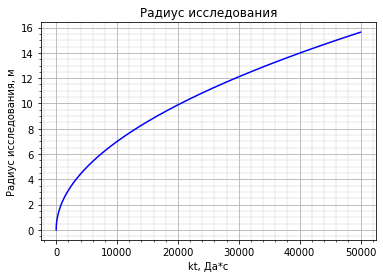

In [5]:
plt.figure()
plt.title('Радиус исследования')
plt.xlabel('kt, Да*с')
plt.ylabel('Радиус исследования, м')
plt.grid(which='major')
plt.minorticks_on()
plt.grid(which='minor', linestyle='--', linewidth=0.4)
plt.plot(kt, exploration_radius(kt) / 100, c='blue')
plt.show()